In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the dataset
df = pd.read_csv("/content/drive/MyDrive/drugs_clean.csv") 
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn's disease and has done very ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
df.shape

(213892, 7)

In [ ]:
# removing null rows
data = df.dropna()

In [ ]:
# load the cleaned dataset to use in analysis and models
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn's disease and has done very ...",8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


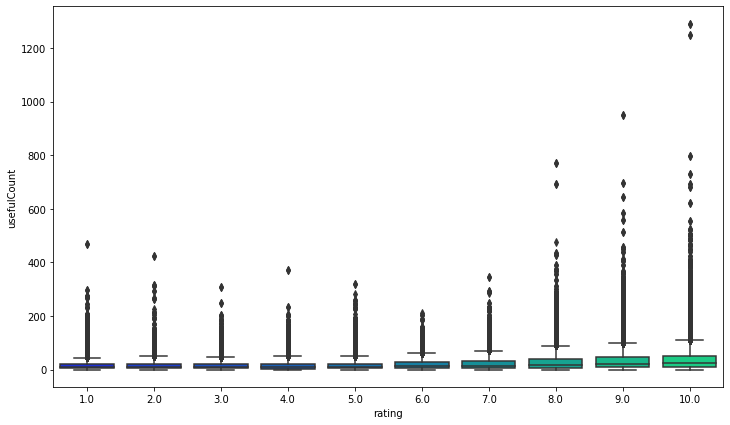

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='rating',y='usefulCount',data=data,palette='winter')
plt.show()

Text(0.5, 1.0, 'correlation heatmap')

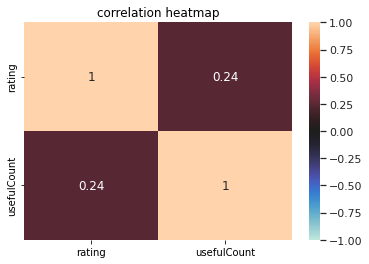

In [ ]:
# code for plotting correlation heatmap 
ax = plt.axes()
sns.set(rc={'figure.figsize':(10,12)})
# plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, center= 0, annot = True)
ax.set_title('correlation heatmap')

In [ ]:
# find the number of unique conditions
unique_con = len(pd.unique(data['condition']))
print("Number of unique conditions: " + str(unique_con))

Number of unique conditions: 836


In [ ]:
# find the number of unique drugs
unique_drug = len(pd.unique(data['drugName']))
print("Number of unique drugs: " + str(unique_drug))

Number of unique drugs: 3654


In [ ]:
# list most common condition in descending order
from collections import Counter
c = Counter(data['condition'].tolist())
con_list = list(c.most_common())
con_list[:10]

[('Birth Control', 38436),
 ('Depression', 12164),
 ('Pain', 8245),
 ('Anxiety', 7812),
 ('Acne', 7435),
 ('Bipolar Disorde', 5604),
 ('Insomnia', 4904),
 ('Weight Loss', 4857),
 ('Obesity', 4757),
 ('ADHD', 4509)]

In [ ]:
# Redundant
# find the 10 top conditions based on number of occurences in the data
top_10 = con_list[:10]
total_rows = 0
for con in top_10:
    con_count = con[1]
    total_rows += con_count

top_10 = dict(top_10)
print(top_10)

{'Birth Control': 38436, 'Depression': 12164, 'Pain': 8245, 'Anxiety': 7812, 'Acne': 7435, 'Bipolar Disorde': 5604, 'Insomnia': 4904, 'Weight Loss': 4857, 'Obesity': 4757, 'ADHD': 4509}


In [ ]:
# filter the dataset to include only the top conditions
top_10_name = list(top_10.keys())
top_drugs = data[data['condition'].isin(top_10_name)]

top_drugs.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
6,Copper,Birth Control,"""I've had the copper coil for about 3 months n...",6.0,"June 6, 2016",1
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


In [ ]:
# find the number of unique drugs for 10 top conditions
unique_drugs = np.unique(top_drugs['drugName'])
print("Number of unique drugs within the top 10 conditions: ", len(unique_drugs))

Number of unique drugs within the top 10 conditions:  815


In [ ]:
# nltk imports
import nltk
import re
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
set_stopwords = set(stopwords.words('english'))
set_stopwords.update(["i've", '"'])
print(set_stopwords)

{'down', 'nor', 'its', 'here', 'yourselves', 'until', 're', "that'll", 'yourself', 'there', 'before', 'with', 'over', 'not', 've', 'most', "didn't", 'in', 'no', "hasn't", 'between', 'very', "isn't", 'after', 'is', 'than', 'don', 'o', "aren't", 'her', 'our', 'has', 'so', 'aren', 'needn', 'of', 'by', "couldn't", "shouldn't", 'further', 'isn', "won't", "wasn't", 'just', 'as', 'me', 'doing', 'they', 'how', 'hers', 'only', 'what', 'whom', 'once', 'should', 'then', 'at', 'through', 'm', 'been', 'when', 'against', 'such', 'shan', "shan't", 'ours', 'theirs', 'did', "mightn't", 'again', 'which', 'these', 'mustn', 'he', "she's", 'both', "you're", 'itself', 'the', 'to', 'were', 'we', 'that', 'can', 'all', 'you', 'any', 'other', "it's", 'i', 'herself', 'because', 'for', 'couldn', 'themselves', "weren't", 'while', 'where', "needn't", 'do', 'some', 'wouldn', 'have', 'from', '"', "don't", 'a', 'my', 'up', "hadn't", 'she', 'didn', 'out', 'am', 'own', 'doesn', "you'll", 'off', 'your', 'and', "doesn't",

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# remove stopwords from the review text
top_drugs['review'] = top_drugs['review'].apply(lambda x: (" ").join([word for word in re.split(' |"', x) if not word.lower() in set_stopwords]))

top_drugs.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"tried antidepressants years (citalopram, fluo...",10.0,"February 28, 2012",22
3,Contrave,Weight Loss,"Contrave combines drugs used alcohol, smoking...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,birth control one cycle. reading reviews type...,9.0,"October 22, 2015",4
6,Copper,Birth Control,copper coil 3 months now. really excited thou...,6.0,"June 6, 2016",1
9,Levora,Birth Control,pill almost two years. work far getting pregn...,2.0,"April 16, 2011",3


In [ ]:
# run sentiment analysis on the review text and calculate the polarity score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound_list = []
for index, row in top_drugs.iterrows():
    review = row['review']
    # save the composite score to the list
    compound = sia.polarity_scores(review)['compound']
    compound_list.append(compound)

In [ ]:
# add new column for the compound score 
top_drugs['compound'] = compound_list

In [ ]:
"""
Function to convert the compound score so it is standardized between 0 and 1 for the Naive Bayes classifier
"""
def convert_compound(row):
    if row['compound'] > 0.05:
        return 1
    elif row['compound'] >= -0.05 and row['compound'] <= 0.05:
        return 0.5
    else:
        return 0
    
# convert compound score
top_drugs['compound'] = top_drugs.apply(convert_compound, axis=1)

In [ ]:
#Function to mark a drug as effective or not, dependent on the user rating
def convert_rating(row):
    if row['rating'] > 5:
        return 1
    else: 
        return 0

# apply the effective drug function to add a new column for effectiveness
top_drugs['rating_binary'] = top_drugs.apply(convert_rating, axis=1)

"""
Function to count the number of words in a review
"""
def count_words(text):
    return len(text.split())

# apply the word count function
top_drugs['word_count'] = top_drugs["review"].apply(lambda x:count_words(x))

"""
Function to count the number of characters in a review
"""
def count_chars(text):
    return sum(len(word) for word in str(text).split(" "))

# apply the character count function
top_drugs['char_count'] = top_drugs["review"].apply(lambda x: count_chars(x))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# make a copy of the top drugs dataframe
preprocessed_data = top_drugs.copy()

preprocessed_data.head()

,drugName,condition,review,rating,date,usefulCount,compound,rating_binary,word_count,char_count
0,Mirtazapine,Depression,"tried antidepressants years (citalopram, fluo...",10.0,"February 28, 2012",22,1.0,1,39,272
3,Contrave,Weight Loss,"Contrave combines drugs used alcohol, smoking...",9.0,"March 5, 2017",35,1.0,1,67,395
4,Cyclafem 1 / 35,Birth Control,birth control one cycle. reading reviews type...,9.0,"October 22, 2015",4,1.0,1,67,370
6,Copper,Birth Control,copper coil 3 months now. really excited thou...,6.0,"June 6, 2016",1,0.0,1,59,316
9,Levora,Birth Control,pill almost two years. work far getting pregn...,2.0,"April 16, 2011",3,0.0,0,45,244


In [ ]:
import collections
# remove single instances of drugs from the preprocessed data 
singles = preprocessed_data['drugName']
single = collections.Counter(singles)
min_threshold = 1
ones = {x: count for x, count in single.items() if count <= min_threshold}
print(len(ones))
one_keys = list(ones.keys())
preprocessed_data = preprocessed_data[~preprocessed_data['drugName'].isin(one_keys)]

121


In [ ]:
# fit the condition to the label encoder 
le.fit(preprocessed_data['condition'])
numerical_condition = le.transform(preprocessed_data['condition'])
# define numerical condition as transformation of encoder 
preprocessed_data['numericalCondition'] = numerical_condition
# fit the drug name to the label encoder 
le.fit(preprocessed_data['drugName'])
numerical_drug_name = le.transform(preprocessed_data['drugName'])
# define numerical drug name as transformation of encoder 
preprocessed_data['numericalDrugName'] = numerical_drug_name
# fit the compound to the label encoder 
le.fit(preprocessed_data['compound'])
compound_class = le.transform(preprocessed_data['compound'])
# define compound as transformation of encoder 
preprocessed_data['compound'] = compound_class
# fit the rating to the label encoder 
le.fit(preprocessed_data['rating'])
rating_class = le.transform(preprocessed_data['rating'])
# define rating as transformation of encoder 
preprocessed_data['rating'] = rating_class

In [ ]:
preprocessed_data

,drugName,condition,review,rating,date,usefulCount,compound,rating_binary,word_count,char_count,numericalCondition,numericalDrugName
0,Mirtazapine,Depression,"tried antidepressants years (citalopram, fluo...",9,"February 28, 2012",22,2,1,39,272,5,400
3,Contrave,Weight Loss,"Contrave combines drugs used alcohol, smoking...",8,"March 5, 2017",35,2,1,67,395,9,147
4,Cyclafem 1 / 35,Birth Control,birth control one cycle. reading reviews type...,8,"October 22, 2015",4,2,1,67,370,4,150
6,Copper,Birth Control,copper coil 3 months now. really excited thou...,5,"June 6, 2016",1,0,1,59,316,4,148
9,Levora,Birth Control,pill almost two years. work far getting pregn...,1,"April 16, 2011",3,0,0,45,244,4,324
...,...,...,...,...,...,...,...,...,...,...,...,...
213872,Zolpidem,Insomnia,started taking medication 10 years ago. docto...,9,"November 16, 2008",103,2,1,28,184,6,684
213878,Geodon,Bipolar Disorde,bad place time started taking it. doctor want...,2,"July 25, 2016",5,2,0,74,389,3,261
213881,Vortioxetine,Depression,third med tried anxiety mild depression. week...,1,"July 17, 2016",33,0,0,19,110,5,662
213882,Ativan,Anxiety,super taking medication. started dealing anxi...,8,"August 16, 2016",61,0,1,76,408,2,68


In [ ]:
# make a copy of the preprocessed data to use for binary tasks and naive bayes
preprocessed_data_binary = preprocessed_data.copy()
preprocessed_data_binary_nb = preprocessed_data.copy()
preprocessed_data_nb = preprocessed_data.copy()

# drop unnecessary columns 
preprocessed_data.drop(columns=['drugName', 'condition', 'review', 'date', 'rating_binary'], inplace=True)
preprocessed_data_nb.drop(columns=['drugName', 'condition', 'review', 'date', 'rating_binary'], inplace=True)

preprocessed_data_binary.drop(columns=['drugName', 'condition', 'review', 'date', 'rating'], inplace=True)
preprocessed_data_binary_nb.drop(columns=['drugName', 'condition', 'review', 'date', 'rating'], inplace=True)


In [ ]:
preprocessed_data.head()

,rating,usefulCount,compound,word_count,char_count,numericalCondition,numericalDrugName
0,9,22,2,39,272,5,400
3,8,35,2,67,395,9,147
4,8,4,2,67,370,4,150
6,5,1,0,59,316,4,148
9,1,3,0,45,244,4,324


In [ ]:
preprocessed_data_binary.head()

,usefulCount,compound,rating_binary,word_count,char_count,numericalCondition,numericalDrugName
0,22,2,1,39,272,5,400
3,35,2,1,67,395,9,147
4,4,2,1,67,370,4,150
6,1,0,1,59,316,4,148
9,3,0,0,45,244,4,324


In [ ]:
# def get_sentiment_label(rating):
#   if rating > 5:
#     result = 1
#   elif rating <= 5:
#     result = 0
#   return result

In [ ]:
# preprocessed_data['sentiment_label'] = preprocessed_data['rating'].apply(get_sentiment_label)

In [ ]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

# multi class split 
X_drug = preprocessed_data.drop('rating', axis=1)
y_drug = preprocessed_data['rating']
X_train, X_test, y_train, y_test = train_test_split(X_drug, y_drug, test_size=0.25)

# multi class naive bayes split
X_drug_nb = preprocessed_data_nb.drop('rating', axis=1)
y_drug_nb = preprocessed_data_nb['rating']
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_drug_nb, y_drug_nb, test_size=0.25, stratify=preprocessed_data_binary[["numericalDrugName"]])

# binary split 
X_drug_b = preprocessed_data_binary.drop('rating_binary', axis=1)
y_drug_b = preprocessed_data_binary['rating_binary']
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_drug_b, y_drug_b, test_size=0.25)

# binary naive bayes split
X_drug_nb_b = preprocessed_data_binary_nb.drop('rating_binary', axis=1)
y_drug_nb_b = preprocessed_data_binary_nb['rating_binary']
X_train_nb_b, X_test_nb_b, y_train_nb_b, y_test_nb_b = train_test_split(X_drug_nb_b, y_drug_nb_b, test_size=0.25, stratify=preprocessed_data_binary[["numericalDrugName"]])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# For Normalizing the data in the other columns - turns raw data into z-scores
# needs to be run on drugs['rating'] and drugs['usefulCount']

def scale_numerical_data(train, test, scaler="standard"):
    col_names = ['usefulCount', 'word_count', 'char_count']
    train_features = train[col_names]
    test_features = test[col_names]
    scaler = StandardScaler().fit(train_features.values)
    train = scaler.transform(train_features.values)
    test = scaler.transform(test_features.values)

    useful_train = train[:,0]
    word_train = train[:,1]
    char_train = train[:, 2]

    useful_test = test[:, 0]
    word_test = test[:,1]
    char_test = test[:, 2]

    return useful_train, useful_test, word_train, word_test, char_train, char_test

useful_train, useful_test, word_train, word_test, char_train, char_test = scale_numerical_data(X_train, X_test)
useful_train_b, useful_test_b, word_train_b, word_test_b, char_train_b, char_test_b = scale_numerical_data(X_train_binary, X_test_binary)
useful_train_nb, useful_test_nb, word_train_nb, word_test_nb, char_train_nb, char_test_nb = scale_numerical_data(X_train_nb, X_test_nb)
useful_train_nb_b, useful_test_nb_b, word_train_nb_b, word_test_nb_b, char_train_nb_b, char_test_nb_b = scale_numerical_data(X_train_nb_b, X_test_nb_b)

X_train['usefulCount'] = useful_train
X_train['word_count'] = word_train
X_train['char_count'] = char_train

X_test['usefulCount'] = useful_test
X_test['word_count'] = word_test
X_test['char_count'] = char_test

X_train_binary['usefulCount'] = useful_train_b
X_train_binary['word_count'] = word_train_b
X_train_binary['char_count'] = char_train_b

X_test_binary['usefulCount'] = useful_test_b
X_test_binary['word_count'] = word_test_b
X_test_binary['char_count'] = char_test_b

X_train_nb['usefulCount'] = useful_train_nb
X_train_nb['word_count'] = word_train_nb
X_train_nb['char_count'] = char_train_nb

X_test_nb['usefulCount'] = useful_test_nb
X_test_nb['word_count'] = word_test_nb
X_test_nb['char_count'] = char_test_nb

X_train_nb_b['usefulCount'] = useful_train_nb_b
X_train_nb_b['word_count'] = word_train_nb_b
X_train_nb_b['char_count'] = char_train_nb_b

X_test_nb_b['usefulCount'] = useful_test_nb_b
X_test_nb_b['word_count'] = word_test_nb_b
X_test_nb_b['char_count'] = char_test_nb_b


In [ ]:
"""
Function to print metrics for a given model and return metrics in a dataframe
"""
def print_metrics(x, y, model, model_name, multiclass=False):
    # define columns for dataframe
    if multiclass==True:
        column_names = ['Accuracy', 'Error', 'F1 Score', 'Precision', 'Recall', 'Cohen Kappa']
    else:
        column_names = ['Accuracy', 'Error', 'F1 Score', 'AUC', 'Precision', 'Recall']
    # create empty datafram to hold metrics 
    metrics = pd.DataFrame(columns=column_names)
    
    # predict y given x
    pred = model.predict(x)
    # calculate accuracy 
    accuracy = accuracy_score(y, pred)
    # calculate f1
    if multiclass==True:
        f1 = f1_score(y, pred, average='micro')
    else:
        f1 = f1_score(y, pred)
    # calculate auc
    if multiclass==True:
        pass
    else:
        auc = roc_auc_score(y, model.predict_proba(x)[:, 1], average='weighted', multi_class='ovr')
    # calculate precision
    precision = precision_score(y, pred, average='weighted', labels=np.unique(pred))
    # calculate recall
    recall = recall_score(y, pred, average='weighted')
    # calculate cohen kappa 
    if multiclass==True:
        c_kappa = cohen_kappa_score(y, pred)
    else:
        pass
    
    # add values to metrics
    if multiclass==True:
        metrics.loc[len(metrics.index)] = [accuracy, 1 - accuracy, f1, precision, recall, c_kappa]
    else:
        metrics.loc[len(metrics.index)] = [accuracy, 1 - accuracy, f1, auc, precision, recall]
    
    # print(model_name)
    # display(metrics)
    return metrics

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score, roc_auc_score

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

**multi class logistic regression**

In [ ]:
# multi class logistic regression
logistic_reg_multi = LogisticRegression(max_iter=10000, solver='sag', multi_class='multinomial')
logistic_reg_multi.fit(X_train, y_train)

print_metrics(X_train, y_train, logistic_reg_multi, "Logistic Regression: Training Data Multi Class", multiclass=True)
print_metrics(X_test, y_test, logistic_reg_multi, "Logistic Regression: Testing Data Multi Class", multiclass=True)

Logistic Regression: Training Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.311706,0.688294,0.311706,0.289246,0.311706,0.101664


Logistic Regression: Testing Data Multi Class


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.307736,0.692264,0.307736,0.224323,0.307736,0.099046


**binary class logistic regression**

In [ ]:
# binary class logistic regression
logistic_reg_binary = LogisticRegression(max_iter=10000, solver='sag')
logistic_reg_binary.fit(X_train_binary, y_train_binary)

print_metrics(X_train_binary, y_train_binary, logistic_reg_binary, "Logistic Regression: Training Data Binary")
print_metrics(X_test_binary, y_test_binary, logistic_reg_binary, "Logistic Regression: Testing Data Binary")

Logistic Regression: Training Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.721748,0.278252,0.809903,0.738231,0.705189,0.721748


Logistic Regression: Testing Data Binary


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.725691,0.274309,0.812114,0.745838,0.710051,0.725691


In [ ]:
df1=print_metrics(X_test_binary, y_test_binary, logistic_reg_binary, "Logistic Regression: Testing Data Binary")

**Naive Bayes**

In [ ]:
df1

,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.725691,0.274309,0.812114,0.745838,0.710051,0.725691


In [ ]:
pip install mixed-naive-bayes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mixed_naive_bayes import MixedNB

**multi class naive bayes**

In [ ]:
# multi class naive bayes
nb_multi = MixedNB(categorical_features=[1,4,5])
nb_multi.fit(X_train_nb, y_train_nb)

print_metrics(X_train_nb, y_train_nb, nb_multi, "Naive Bayes: Training Data Multi Class", multiclass=True)
print_metrics(X_test_nb, y_test_nb, nb_multi, "Naive Bayes: Testing Data Multi Class", multiclass=True)

,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.276906,0.723094,0.276906,0.228332,0.276906,0.123676


**binary naive bayes**

In [ ]:
# binary naive bayes
nb_binary = MixedNB(categorical_features=[1,4,5])
nb_binary.fit(X_train_nb_b, y_train_nb_b)

print_metrics(X_train_nb_b, y_train_nb_b, nb_binary, "Naive Bayes: Training Data Binary")
print_metrics(X_test_nb_b, y_test_nb_b, nb_binary, "Naive Bayes: Testing Data Binary")

,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.668208,0.331792,0.732686,0.744854,0.713428,0.668208


In [ ]:
df2 = print_metrics(X_test_nb_b, y_test_nb_b, nb_binary, "Naive Bayes: Testing Data Binary")

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

**multi class random forest**

In [ ]:
# multi class random forest

# define number of trees 
trees = [50, 100, 250, 500]

# define classifier
for num_trees in trees:
    rand_forest = RFC(n_estimators=num_trees, random_state=42)
    rand_forest.fit(X_train, y_train)
    print_metrics(X_train, y_train, rand_forest, "Random Forest: Training Data Multi Class " + str(num_trees) + " trees", multiclass=True)
    print_metrics(X_test, y_test, rand_forest, "Random Forest: Testing Data Multi Class " + str(num_trees)+ " trees", multiclass=True)

Random Forest: Training Data Multi Class 50 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.997972,0.002028,0.997972,0.997972,0.997972,0.997597


Random Forest: Testing Data Multi Class 50 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.417792,0.582208,0.417792,0.401156,0.417792,0.2906


Random Forest: Training Data Multi Class 100 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.997985,0.002015,0.997985,0.997985,0.997985,0.997612


Random Forest: Testing Data Multi Class 100 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.427731,0.572269,0.427731,0.411579,0.427731,0.300911


Random Forest: Training Data Multi Class 250 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.997985,0.002015,0.997985,0.997985,0.997985,0.997612


Random Forest: Testing Data Multi Class 250 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.429841,0.570159,0.429841,0.414672,0.429841,0.302422


Random Forest: Training Data Multi Class 500 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.997985,0.002015,0.997985,0.997985,0.997985,0.997612


Random Forest: Testing Data Multi Class 500 trees


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.43126,0.56874,0.43126,0.415807,0.43126,0.304028


**binary random forest**

In [ ]:
# binary random forest

# define number of trees 
trees = [50, 100, 250, 500]

# define classifier
for num_trees in trees:
    rand_forest = RFC(n_estimators=num_trees, random_state=42)
    rand_forest.fit(X_train_binary, y_train_binary)
    print_metrics(X_train_binary, y_train_binary, rand_forest, "Random Forest: Training Data Binary " + str(num_trees) + " trees")
    print_metrics(X_test_binary, y_test_binary, rand_forest, "Random Forest: Testing Data Binary " + str(num_trees) + " trees")


Random Forest: Training Data Binary 50 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998715,0.001285,0.999065,0.999992,0.998715,0.998715


Random Forest: Testing Data Binary 50 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.761267,0.238733,0.832351,0.809785,0.753706,0.761267


Random Forest: Training Data Binary 100 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998905,0.001095,0.999203,0.999996,0.998905,0.998905


Random Forest: Testing Data Binary 100 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.763458,0.236542,0.834755,0.814427,0.755085,0.763458


Random Forest: Training Data Binary 250 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998905,0.001095,0.999203,0.999997,0.998905,0.998905


Random Forest: Testing Data Binary 250 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.76431,0.23569,0.83569,0.817216,0.75566,0.76431


Random Forest: Training Data Binary 500 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.998905,0.001095,0.999203,0.999997,0.998905,0.998905


Random Forest: Testing Data Binary 500 trees


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.764472,0.235528,0.836081,0.817281,0.755576,0.764472


In [ ]:
rand_forest = RFC(n_estimators=50, random_state=42)
rand_forest.fit(X_train_binary, y_train_binary)
df3= print_metrics(X_test_binary, y_test_binary, rand_forest, "Random Forest: Testing Data Binary " + str(50) + " trees")

In [ ]:
df3

,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.765567,0.234433,0.835464,0.812035,0.757564,0.765567


**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ABC

**BinaryClass adaboost**

In [ ]:
# multi class adaboost

# define classifier
for num_clf in [10, 50, 100, 500]:
    adaboost = ABC(n_estimators=num_clf)
    adaboost.fit(X_train, y_train)
    print_metrics(X_train, y_train, adaboost, "AdaBoost: Training Data Multi Class " + str(num_clf) + " classifiers", multiclass=True)
    print_metrics(X_test, y_test, adaboost, "AdaBoost: Testing Data Multi Class " + str(num_clf) + " classifiers", multiclass=True)

AdaBoost: Training Data Multi Class 10 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.314965,0.685035,0.314965,0.26584,0.314965,0.104238


AdaBoost: Testing Data Multi Class 10 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.312563,0.687437,0.312563,0.265836,0.312563,0.103004


AdaBoost: Training Data Multi Class 50 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.317589,0.682411,0.317589,0.268333,0.317589,0.11112


AdaBoost: Testing Data Multi Class 50 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.314267,0.685733,0.314267,0.259672,0.314267,0.108869


AdaBoost: Training Data Multi Class 100 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.318048,0.681952,0.318048,0.265105,0.318048,0.112567


AdaBoost: Testing Data Multi Class 100 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.313659,0.686341,0.313659,0.23535,0.313659,0.108827


AdaBoost: Training Data Multi Class 500 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.321091,0.678909,0.321091,0.236436,0.321091,0.119151


AdaBoost: Testing Data Multi Class 500 classifiers


,Accuracy,Error,F1 Score,Precision,Recall,Cohen Kappa
0,0.315525,0.684475,0.315525,0.208888,0.315525,0.11371


**MultiClass SVC**

In [ ]:
# binary adaboost

# define classifier
for num_clf in [10, 50, 100, 500]:
    adaboost = ABC(n_estimators=num_clf)
    adaboost.fit(X_train_binary, y_train_binary)
    print_metrics(X_train_binary, y_train_binary, adaboost, "AdaBoost: Training Data Binary " + str(num_clf) + " classifiers")
    print_metrics(X_test_binary, y_test_binary, adaboost, "AdaBoost: Testing Data Binary " + str(num_clf) + " classifiers")


AdaBoost: Training Data Binary 10 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.724926,0.275074,0.809899,0.742845,0.711123,0.724926


AdaBoost: Testing Data Binary 10 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.725001,0.274999,0.809637,0.744215,0.711184,0.725001


AdaBoost: Training Data Binary 50 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.733891,0.266109,0.819477,0.756877,0.718068,0.733891


AdaBoost: Testing Data Binary 50 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.732709,0.267291,0.818189,0.75833,0.717129,0.732709


AdaBoost: Training Data Binary 100 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.736704,0.263296,0.821644,0.760757,0.721192,0.736704


AdaBoost: Testing Data Binary 100 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.734899,0.265101,0.819948,0.761712,0.719535,0.734899


AdaBoost: Training Data Binary 500 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.743682,0.256318,0.827231,0.769896,0.729072,0.743682


AdaBoost: Testing Data Binary 500 classifiers


,Accuracy,Error,F1 Score,AUC,Precision,Recall
0,0.742282,0.257718,0.825749,0.769592,0.727952,0.742282


In [ ]:
adaboost = ABC(n_estimators=10)
adaboost.fit(X_train_binary, y_train_binary)
df4 = print_metrics(X_test_binary, y_test_binary, adaboost, "AdaBoost: Testing Data Binary " + str(10) + " classifiers")

In [ ]:
df = pd.concat([df1,df2,df3,df4])

In [ ]:
df.index = ['logistic','Naive Bayes','Random Forest','Adaboost']

In [ ]:
df

,Accuracy,Error,F1 Score,AUC,Precision,Recall
logistic,0.725691,0.274309,0.812114,0.745838,0.710051,0.725691
Naive Bayes,0.668208,0.331792,0.732686,0.744854,0.713428,0.668208
Random Forest,0.765567,0.234433,0.835464,0.812035,0.757564,0.765567
Adaboost,0.728206,0.271794,0.815346,0.746747,0.711696,0.728206


**ROC Curves**

In [ ]:
from sklearn.metrics import RocCurveDisplay


In [ ]:
# ROC curve: Logistic Regression Binary
logistic_reg_binary = LogisticRegression(max_iter=10000, solver='sag')
logistic_reg_binary = logistic_reg_binary.fit(X_train_binary, y_train_binary)
y_pred_log= logistic_reg_binary.predict(X_train_binary)

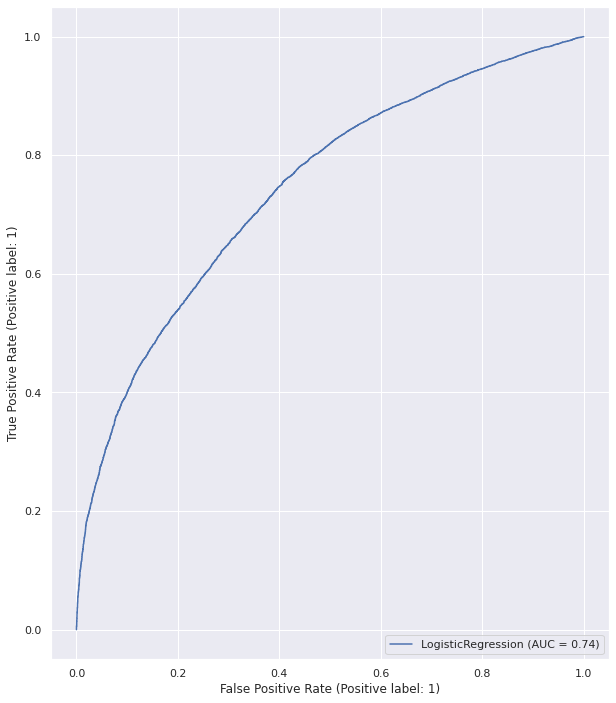

In [ ]:
ax = plt.gca()
RocCurveDisplay.from_estimator(logistic_reg_binary, X_test_binary, y_test_binary, ax=ax)

In [ ]:
# ROC curve: Naive Bayes Binary
nb_binary = MixedNB(categorical_features=[1,4,5])
nb_binary.fit(X_train_nb_b, y_train_nb_b)
y_test_pred_nb= nb_binary.predict(X_test_nb_b)

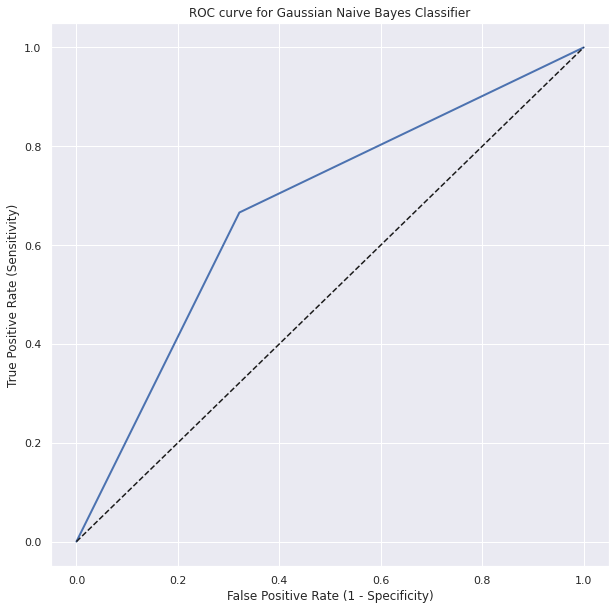

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_nb_b, y_test_pred_nb)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# ROC curve: Random Forest Binary
rfc = RFC(n_estimators=250, random_state=42, criterion='entropy')
rfc = rfc.fit(X_train_binary, y_train_binary)
y_pred_rfc= rfc.predict(X_train_binary)

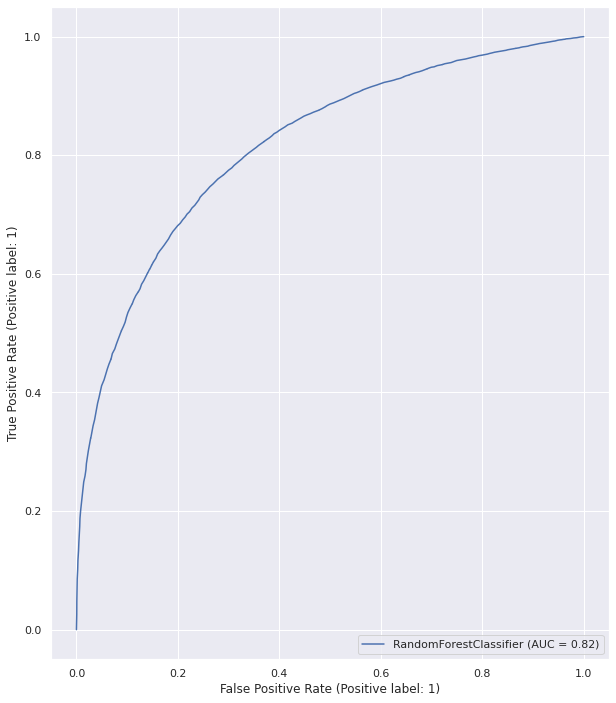

In [ ]:
ax = plt.gca()
RocCurveDisplay.from_estimator(rfc, X_test_binary, y_test_binary, ax=ax)

In [ ]:
# ROC curve: AdaBoost Binary
abc = ABC(n_estimators=100)
abc = abc.fit(X_train_binary, y_train_binary)
y_pred_abc= abc.predict(X_train_binary)

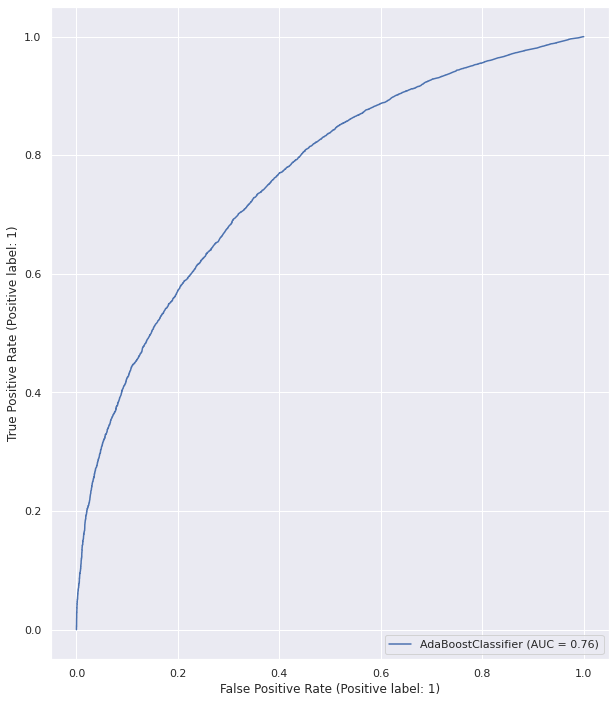

In [ ]:
ax = plt.gca()
RocCurveDisplay.from_estimator(abc, X_test_binary, y_test_binary, ax=ax)

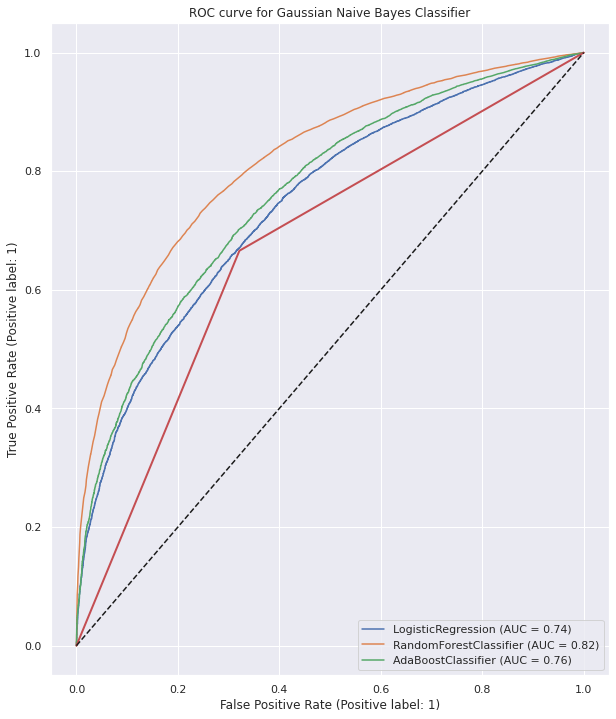

In [ ]:
# all models in a list
curves = [logistic_reg_binary, rfc, abc, nb_binary]

# iterate through each model and plot the curve
ax = plt.gca()
a=0
for c in curves:
  if a<=2:
    RocCurveDisplay.from_estimator(c, X_test_binary, y_test_binary, ax=ax)
    plt.title('ROC Curve Comparison for Binary Classification Models')
  else:
    # RocCurveDisplay.from_estimator(c, X_test_binary, y_test_binary, ax=ax)
    fpr, tpr, thresholds = roc_curve(y_test_nb_b, y_test_pred_nb)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Gaussian Naive Bayes Classifier')
  a = a+1
